In [306]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.subplots import make_subplots 
import plotly.figure_factory as ff 
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

In [332]:
csv = 'C:/Users/hamma/C02/Co2.csv'
df = pd.read_csv(csv)

In [333]:
print ('Missing values:',df.isnull().sum().sum())

Missing values: 2884


In [347]:
df1=df.set_index(['Country Name'])
df1.describe()

1960        1961        1962        1963        1964        1965  \
count  203.000000  204.000000  206.000000  207.000000  213.000000  213.000000   
mean     3.160220    3.292338    3.462051    3.906006    4.007034    4.029132   
std     14.821169   15.114669   16.286958   16.909771   16.325047   15.139695   
min      0.007984    0.007857    0.008435    0.009336    0.011589    0.011851   
25%      0.195031    0.185078    0.211355    0.208805    0.219304    0.236942   
50%      0.616754    0.662374    0.659399    0.706050    0.793962    0.794770   
75%      2.060142    2.420962    2.526705    2.270349    2.523331    2.630170   
max    204.631696  208.837879  226.081890  214.785217  207.626699  185.213644   

             1966        1967        1968        1969  ...        2011  \
count  213.000000  213.000000  213.000000  213.000000  ...  239.000000   
mean     3.992162    4.249468    4.363587    5.240497  ...    4.315602   
std     14.054838   15.943855   14.936638   19.691750  ...    4.912689   
min      0.013248    0.011791   -0.020098    0.016104  ...    0.000000   
25%      0.258556    0.265284    0.293462    0.334922  ...    0.798791   
50%      0.885508    1.032198    1.004645    1.104632  ...    2.689378   
75%      3.202366    3.913345    4.072719    4.167117  ...    6.188510   
max    172.158729  210.819017  194.917536  253.544574  ...   32.305726   

             2012        2013        2014        2015        2016        2017  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     4.372246    4.280935    4.195690    4.148874    4.147100    4.154185   
std      4.894707    4.844110    4.732984    4.654801    4.592901    4.575980   
min      0.035207    0.042976    0.039617    0.037904    0.026146    0.028010   
25%      0.805751    0.815681    0.824377    0.806683    0.818367    0.851900   
50%      2.869867    2.695691    2.698682    2.696240    2.754968    2.667119   
75%      6.315302    6.284435    6.108660    5.920151    5.836392    6.158644   
max     33.373132   31.927018   32.693532   32.470570   32.128042   32.179371   

             2018  2019  2020  
count  239.000000   0.0   0.0  
mean     4.158613   NaN   NaN  
std      4.547079   NaN   NaN  
min      0.026169   NaN   NaN  
25%      0.827804   NaN   NaN  
50%      2.691814   NaN   NaN  
75%      6.069018   NaN   NaN  
max     32.415639   NaN   NaN  

[8 rows x 61 columns]

In [324]:
df2=df1.transpose()
df2.drop("Country Code",inplace=True)
df2.drop("Indicator Name",inplace=True)
df2.drop("Indicator Code",inplace=True)
df2.head(5)

Country Name       Aruba Africa Eastern and Southern Afghanistan  \
1960          204.631696                     0.90606    0.046057   
1961          208.837879                    0.922474    0.053589   
1962           226.08189                    0.930816    0.073721   
1963          214.785217                     0.94057    0.074161   
1964          207.626699                    0.996033    0.086174   

Country Name Africa Western and Central    Angola   Albania Andorra  \
1960                            0.09088  0.100835  1.258195     NaN   
1961                           0.095283  0.082204  1.374186     NaN   
1962                           0.096612  0.210533  1.439956     NaN   
1963                           0.112376  0.202739  1.181681     NaN   
1964                           0.133258  0.213562  1.111742     NaN   

Country Name Arab World United Arab Emirates Argentina  ...  \
1960           0.609268             0.119037  2.383343  ...   
1961           0.662618             0.109136  2.458551  ...   
1962           0.727117             0.163542  2.538447  ...   
1963           0.853116             0.175833  2.330685  ...   
1964           0.972381             0.132815  2.553442  ...   

Country Name Virgin Islands (U.S.)   Vietnam   Vanuatu     World     Samoa  \
1960                           NaN  0.181947       NaN  3.121158  0.135031   
1961                           NaN  0.183099       NaN   3.06809  0.163542   
1962                           NaN  0.217694  0.595002  3.114839  0.158377   
1963                           NaN  0.196997  0.471849  3.221195  0.184037   
1964                           NaN   0.20987  0.864427  3.324046  0.208106   

Country Name Kosovo Yemen, Rep. South Africa    Zambia  Zimbabwe  
1960            NaN    0.011038     5.727223       NaN       NaN  
1961            NaN    0.013599     5.832621       NaN       NaN  
1962            NaN    0.012729     5.887168       NaN       NaN  
1963            NaN    0.014518     5.961337       NaN       NaN  
1964            NaN     0.01755     6.332343  0.946606  1.034904  

[5 rows x 266 columns]

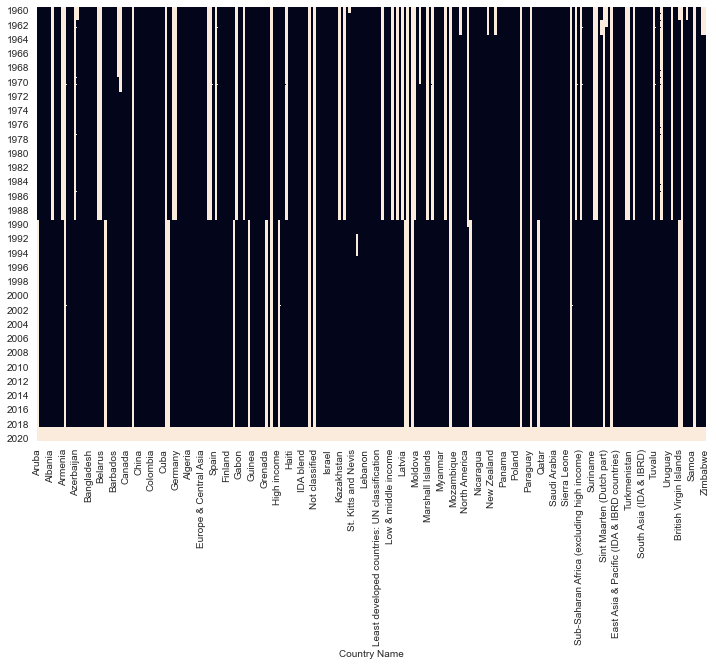

In [310]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.isnull(),cbar=False)
plt.show()

In [311]:
line = px.line(data_frame= df2, x = df2.index,y =["World"] , markers = True)
line.update_traces(line_color="red")
line.update_yaxes(title_text = 'CO2 emissions (metric tons per capita)')
line.update_xaxes(title_text = 'Year',
    rangeslider_visible = False)
line.update_layout(legend=dict(title="Country"),
                  showlegend = True,
    title = {
        'text': 'CO2 Emissions World Wide',
        'y':0.94,
        'x':0.53,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [340]:
df3=df.T
df3 = df3.rename(columns=df3.iloc[0])
df3 = df3.drop(['Country Name'], axis=0)
df3.drop("Country Code",inplace=True)
df3.drop("Indicator Name",inplace=True)
df3.drop("Indicator Code",inplace=True)
df3 = df3.dropna(axis=1, how='all')
df3 = df3.astype(float)

In [341]:
df3.describe()

Aruba  Africa Eastern and Southern  Afghanistan  \
count   30.000000                    59.000000    59.000000   
mean   184.079829                     1.089405     0.149382   
std     84.724762                     0.157525     0.085583   
min      2.868274                     0.900399     0.037055   
25%    169.081608                     0.971170     0.073941   
50%    199.774616                     1.033908     0.149651   
75%    232.217652                     1.188124     0.207444   
max    360.853233                     1.431964     0.407074   

       Africa Western and Central     Angola    Albania    Andorra  \
count                   59.000000  59.000000  59.000000  29.000000   
mean                     0.440692   0.687540   1.660433   6.778152   
std                      0.147548   0.329161   0.643504   0.688945   
min                      0.090880   0.082204   0.470098   5.807128   
25%                      0.443857   0.476051   1.258155   6.104134   
50%                      0.476438   0.640966   1.572251   6.733479   
75%                      0.515941   0.912209   2.001541   7.344262   
max                      0.648273   1.285365   2.898209   7.952286   

       Arab World  United Arab Emirates  Argentina  ...  Venezuela, RB  \
count   59.000000             59.000000  59.000000  ...      59.000000   
mean     2.923164             30.416576   3.544621  ...       5.687312   
std      1.089531             20.916706   0.512579  ...       0.521609   
min      0.609268              0.109136   2.330685  ...       4.225144   
25%      2.340655             20.406460   3.278312  ...       5.336008   
50%      3.091803             28.994996   3.642232  ...       5.780234   
75%      3.417984             33.133602   3.862388  ...       6.064246   
max      4.617964            101.053155   4.359886  ...       7.009414   

       British Virgin Islands    Vietnam    Vanuatu      World      Samoa  \
count               28.000000  59.000000  57.000000  59.000000  59.000000   
mean                 2.363112   0.716099   0.530864   4.109284   0.693014   
std                  1.110870   0.652798   0.154410   0.440680   0.371951   
min                  0.398025   0.181947   0.326525   3.068090   0.135031   
25%                  1.787895   0.287286   0.436545   3.805353   0.282534   
50%                  2.451580   0.404750   0.486581   4.281006   0.711368   
75%                  3.062351   0.936470   0.586726   4.472535   0.929421   
max                  4.085794   2.698806   1.074339   4.696086   1.631588   

       Yemen, Rep.  South Africa     Zambia   Zimbabwe  
count    59.000000     59.000000  55.000000  55.000000  
mean      0.442130      7.497467   0.479936   1.201970  
std       0.369435      1.136301   0.313848   0.302564  
min       0.011038      5.727223   0.158363   0.613916  
25%       0.072521      6.577222   0.219073   0.910479  
50%       0.326682      7.446834   0.349232   1.229248  
75%       0.788088      8.055625   0.672690   1.422052  
max       1.139166      9.922518   1.261960   1.713321  

[8 rows x 250 columns]

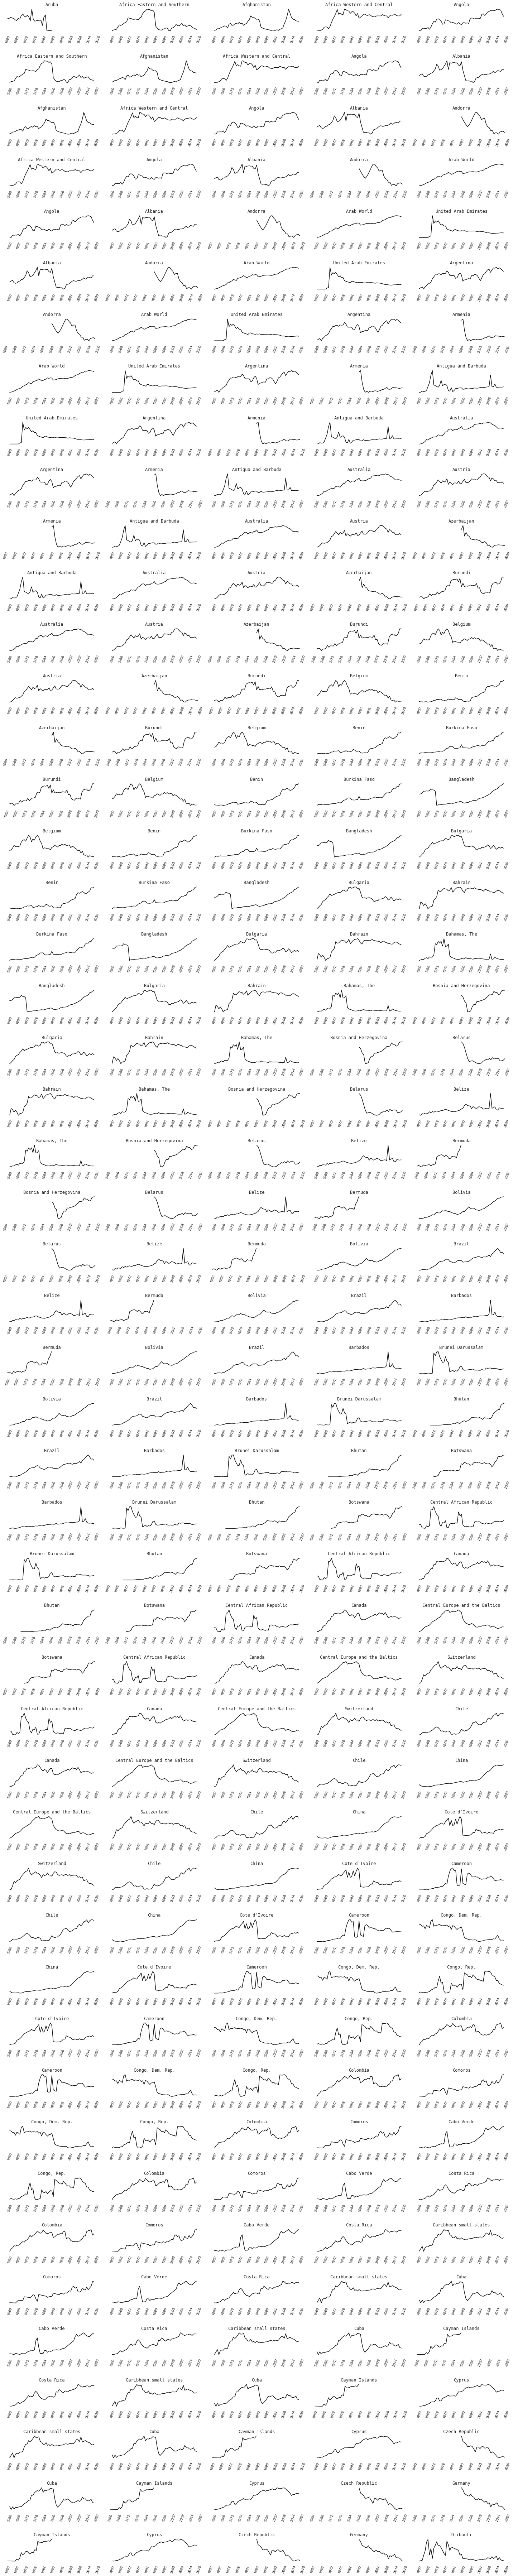

In [342]:
fig = plt.figure(figsize = (20, 100))
spec = gridspec.GridSpec(ncols=5, nrows=50, figure=fig)

countries = df3.columns.tolist()[:249]

for i in range(5):
    for j in range(50):
        ax = fig.add_subplot(spec[j,i])
        sns.set_style("white")
        plt.title(countries[i+j], size = 12, fontname = 'monospace')
        ax.plot(df3[countries[i+j]].index, df3[countries[i+j]].values, color='#0d0d0d')
        ax.set_xticklabels(df3[countries[i+j]].index[::6], rotation=70)
        ax.set_xticks(df3[countries[i+j]].index[::6])
        ax.set_yticklabels([])
        for s in ['top', 'right', 'bottom', 'left']:
            ax.spines[s].set_visible(False)

fig.tight_layout(h_pad = 3)
plt.show()

In [296]:
df.dropna(subset = ['1990'], inplace = True)  
df.fillna(0, inplace = True)

In [297]:
df.drop(["Country Code"],   axis = 1,inplace=True)
df.drop(["Indicator Name"], axis = 1,inplace=True)
df.drop(["Indicator Code"], axis = 1,inplace=True)

In [298]:
Continent = {'Africa' : {"Cote d'Ivoire", 'Congo, Dem. Rep.', 'Gambia, The', 'Egypt, Arab Rep.', 'Congo, Rep.', 'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 
                         'Comoros', 'Congo/Republic of the Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 
                         'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 
                         'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
                         'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'},
             'Asia' : {'Syrian Arab Republic', 'Yemen, Rep.', 'Lao PDR', 'Kyrgyz Republic', 'Hong Kong SAR, China', 'Macao SAR, China', "Korea, Dem. People's Rep.", 'Iran, Islamic Rep.', 'Uzbekistan', 'Korea, Rep.', 'Brunei Darussalam', 'Afghanistan', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'British Indian Ocean Territory', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
                       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
                       'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 
                       'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekstan', 'Vietnam', 'Yemen'},
             'Europe' : {'Sint Maarten (Dutch part)', 'Russian Federation', 'Slovak Republic', 'Faroe Islands', 'British Virgin Islands', 'Isle of Man', 'Channel Islands', 'Kosovo', 'Czech Republic', 'Albania', 'Andorra', 'Armenia', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia/Chech Republic', 'Denmark', 'Estonia',
                         'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 
                         'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
                         'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'}, 
             'North America' : {'St. Vincent and the Grenadines', 'Turks and Caicos Islands', 'St. Martin (French part)', 'Puerto Rico', 'St. Kitts and Nevis', 'Cayman Islands', 'Curacao', 'Nicaragua', 'Virgin Islands (U.S.)', 'St. Lucia', 'Bahamas, The', 'United States', 'Bermuda', 'Antigua and Barbuda', 'Bahamas, the', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti',
                                'Honduras', 'Jamaica', 'Mexico', 'Panama', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'Unided States of America'},
             'South America' : {'Venezuela, RB', 'Aruba', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'}, 
             'Oceania' : {'French Polynesia', 'Micronesia, Fed. Sts.', 'Guam', 'New Caledonia', 'American Samoa', 'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'}}

In [299]:
def return_continent(row) : 
    try : 
        for continent in Continent.keys() : 
            if row['Country Name'] in Continent[continent] : 
                return continent
    except : 
        return "Others"
df['Continent'] = df.apply(return_continent, axis = 1)

In [300]:
Other_category = df.loc[df['Continent'].isnull(), 'Country Name'].values
df_other = df[df['Country Name'].isin(Other_category)].reset_index(drop = True)
df_other.drop(columns = ['Continent'], inplace = True)
df = df[~(df['Country Name'].isin(Other_category))]
dff = pd.melt(df, id_vars = ['Continent', 'Country Name'], 
              value_vars = [col for col in df.columns if col not in ['Country Name', 'Continent']], 
              var_name = 'Year',
              value_name = 'Emmisions')

dff_other = pd.melt(df_other, id_vars = ['Country Name'], value_vars = [col for col in df_other.columns if col not in ['Country Name']],
                    var_name = 'Year', value_name = 'Emmisions').rename(columns = {'Country Name' : 'Category'})

In [301]:
fig = px.box(dff, y = 'Emmisions', animation_frame = 'Year', color = 'Continent')
fig.update_yaxes(type = 'log')
fig.update_layout(
    {
        "title": {
            "text": "<b>CO2 Emmision's year by year</b>",
            "x": 0.5,
            "y": 0.95,
            "font": {
                "size": 20
            }
        },
        "template":'seaborn'
    }
)
fig.show() 

In [302]:
Geo_cat = ['Africa Eastern and Southern', 'Africa Western and Central', 'Arab Wrold', 'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific', 
           'Europe & Central Asia', 'Euro area', 'European Union', 'Latin America & Caribbean', 'Middle East & North Africa', 'Other small states', 'Pacific island small states', 
           'South Asia', 'Sub-Saharan Africa', 'Small states', 'World']
DEV_ING = ['Heavily indebted poor countries (HIPC)', 'Least developed countries: UN classification', 'OECD members', 'Developed' ]

In [303]:
fig = go.Figure()

for cat in Geo_cat : 
        fig.add_trace(go.Scatter(
            x = dff_other.Year.unique(),
            y = dff_other.loc[dff_other.Category == cat, 'Emmisions'],
            name = cat,
            hovertext = [f'Geo : {cat}<br>=========================<br>Emmisions : {dff_other.Emmisions.iloc[ix]}' for ix in dff_other[dff_other.Category == cat].index]
        ))

fig.update_layout(
        {
            "title": {
                "text": "<b>Emmision by geographic till 2018</b>",
                "x": 0.25,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Age Decades",
                "showticklabels":True,
                "tickfont": {
                    "size": 15                
                }
            },
            "yaxis": {
                "title": "Emmisions",
                "tickfont": {
                    "size": 15               
                }
            },
            "template":'seaborn'
        }
    )

fig.show()

In [304]:
fig = go.Figure()

for cat in DEV_ING : 
        fig.add_trace(go.Scatter(
            x = dff_other.Year.unique(),
            y = dff_other.loc[dff_other.Category == cat, 'Emmisions'],
            name = cat,
            hovertext = [f'Geo : {cat}<br>=========================<br>Emmisions : {dff_other.Emmisions.iloc[ix]}' for ix in dff_other[dff_other.Category == cat].index]
        ))

fig.update_layout(
        {
            "title": {
                "text": "<b>Emmision by geographic through the year</b>",
                "x": 0.2,
                "y": 0.9,
                "font": {
                    "size": 15
                }
            },
            "xaxis": {
                "title": "Age Decades",
                "showticklabels":True,
                "tickfont": {
                    "size": 15                
                }
            },
            "yaxis": {
                "title": "Emmisions",
                "tickfont": {
                    "size": 15               
                }
            },
            "template":'seaborn'
        }
    )

fig.show()